In [404]:
import matplotlib.pyplot as plt
import numpy as np

In [405]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def returnPoint(self):
        return (self.x, self.y)     

In [406]:
class InnerNode:
    def __init__(self, idd = None, f = None, lson = None, rson = None, maxY = None, Q = None, B = 0):
        self.idd = idd #Debugging
        self.f = f #pointer to father
        self.lson = lson #pointer to left son
        self.rson = rson #pointer to right son
        self.maxY = maxY 
        #largest y-value in subtree of lson for lc
        #largest y-value in subtree of rson for rc    
        self.Q = Q #segment of Q_a that did not contribute to Q_f
        self.B = B #number of points of Q_a that contribute to Q_f
    
    def printData(self):
        printID = self.idd
        if self.f:
            printF = self.f.idd
        else:
            printF = "NONE"
        
        if(not self.lson is None):
            printLson = self.lson.idd
        else:
            printLson = "NONE"
            
        if(not self.rson is None):
            printRson = self.rson.idd
        else:
            printRson = "NONE"
        
        printMaxY = self.maxY
        if self.Q:
            printQ = "["
            for i in range(len(self.Q)-1):
                printQ += "({},{}),".format(self.Q[i].x,self.Q[i].y)
            printQ += "({},{})".format(self.Q[len(self.Q)-1].x, self.Q[len(self.Q)-1].y)
            printQ += "]"
        else:
            printQ = "NONE"
        if self.B:
            printB = self.B
        else:
            printB = "0"
            
        print("id: {}, f: {}, lson: {}, rson: {}, maxY: {}, Q: {}, B: {}".format(printID, printF, printLson, printRson, printMaxY, printQ, printB))
    

In [407]:
import math
def create_points_circle(r, n):
    pi = math.pi
    points = []
    for i in range(n):
        x = math.cos(2*pi*(np.random.rand()*max)/n*i)*r *(np.random.rand())
        y = math.sin(2*pi*(np.random.rand()*max)/n*i)*r *(np.random.rand())
        x = np.ceil(x+r)
        y = np.ceil(y+r)
        x = np.absolute(x)
        y = np.absolute(y)
        for j in range(len(points)):
            while(np.absolute(points[j].x - x) < 2):
                x = math.cos(2*pi*(np.random.rand()*max)/n*i)*r *(np.random.rand())
                x = np.ceil(x)
                x = np.absolute(x)
            while(np.absolute(points[j].y - y) <1):
                y = math.cos(2*pi*(np.random.rand()*max)/n*i)*r *(np.random.rand())
                y = np.ceil(y)
                y = np.absolute(y)
        
        p = Point(x, y)
        points.append(p)
    return points

In [408]:
def plotPoints(points, Y0, showAngles=False, hull=None):
    n = len(points)
    if(showAngles == True):
        point1 = [Y0.x, Y0.y]
        for i in range(n):
            point2 = [points[i].x,points[i].y]
            x_values = [point1[0], point2[0]]
            y_values = [point1[1], point2[1]]
            plt.plot(x_values, y_values, 'b-', linewidth=0.1)
            plt.plot(point2[0], point2[1], 'b.')
    
    if hull:
        x0 = hull[0].x
        y0 = hull[0].y
        
        for p in hull[1:]:
            x1 = p.x
            y1 = p.y
            plt.plot([x0, x1], [y0, y1])
            x0, y0 = x1, y1
        
    
    for i in range(n):
        plt.plot(points[i].x, points[i].y, "b.")
    plt.plot(Y0.x, Y0.y, "go")
    plt.show()

In [409]:
def printList(points):
    for i in range(len(points)):
        print(points[i].x, points[i].y)

In [410]:
def isBetween(a, b, c):
    if(c.y <= a.y and c.y >= b.y):
        if(c.x <= a.x and c.x >= b.x):
            return True
        if(c.x >= a.x and c.x <= b.x):
            return True
    if(c.y >= a.y and c.y <= b.y):
        if(c.x <= a.x and c.x >= b.x):
            return True
        if(c.x >= a.x and c.x <= b.x):
            return True
    return False

In [411]:
def isIntersecting(line1, line2, isInfinite=False, case9 = False, debug=False, hull="lc"):
    epsilon = 0.01
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if(div == 0):
        return np.inf, np.inf
        
    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div

    p1 = Point(line2[0][0], line2[0][1])
    p2 = Point(line2[1][0], line2[1][1])
    
    if(isBetween(p1, p2, Point(x,y)) or case9):
        return x, y
    
    if(isInfinite):
        if(hull == "lc"):
            if(x >= line2[0][0] or x >=line2[1][0]):
                return x,y
        else:
            if(x <= line2[0][0] or x <=line2[1][0]):
                return x,y
        
    return np.inf, np.inf

In [412]:
### ALL DRAWING STUFF

def drawQStructure(Q, ax):
    x0 = Q[0].x
    y0 = Q[0].y
    for p in Q:
        
        x1 = p.x
        y1 = p.y
    
    for i in range(len(Q)):
        ax.plot(Q[i].x, Q[i].y, "b.")
        

def drawIntersection(p,q,a,b, ax):
    ax.plot([p[0], q[0]], [p[1], q[1]], 'k-', linewidth=0.5, alpha=0.7)
    ax.plot([a[0], b[0]], [a[1], b[1]], 'g-', linewidth=0.5)

def drawEdges(Q, ax):
    x0 = Q[0].x
    y0 = Q[0].y
    for p in Q:
            x1 = p.x
            y1 = p.y
            ax.plot([x0, x1], [y0, y1])
            x0, y0 = x1, y1
                   
def drawPQ(p,q,ax):
    ax.plot(p[0], p[1], "ro")
    ax.plot(q[0], q[1], "ro")
        
def drawPointColor(x, y, col, ax):
    ax.plot(x, y, col)   
        
def correctPlot(fig):
    n = len(fig.axes)
    for i in range(n):
        fig.axes[i].change_geometry(1, n+1, i+1)
    return fig

In [413]:
def scale(p1,p2,factor):
    t0=0.5*(1.0-factor)
    t1=0.5*(1.0+factor)
    x1 = p1[0] +(p2[0] - p1[0]) * t0
    y1 = p1[1] +(p2[1] - p1[1]) * t0
    x2 = p1[0] +(p2[0] - p1[0]) * t1
    y2 = p1[1] +(p2[1] - p1[1]) * t1
    return [x1,y1],[x2,y2]

In [414]:
def checkDuplicate(p1,p2, debug=False):
    if(p1[0] - p2[0] == 0 and p1[1] - p2[1] == 0):
        return True
    return False

In [415]:
def findBridge(Q_A_IN, Q_C_IN, iteration, draw=True, debug=False, hull="lc"):

    Q_A = Q_A_IN.copy()
    Q_C = Q_C_IN.copy()
    
    if(len(Q_A) < 2):
        pID = 0
    else:    
        pID = math.floor(len(Q_A)/2)
    
    if(len(Q_C) < 2):
        qID = 0
    else:
        qID = math.floor(len(Q_C)/2)
    
    p = [Q_A[pID].x, Q_A[pID].y]
    q = [Q_C[qID].x, Q_C[qID].y]
           
    pScaled, qScaled = scale(p,q,10)
    t = [pScaled, qScaled]
    
    
    InterListA = [(Q_A[pID].x,Q_A[pID].y)]
    
    for i in range(1, len(Q_A)):
        a = [Q_A[i-1].x, Q_A[i-1].y]
        b = [Q_A[i].x, Q_A[i].y]
        
        intersect = isIntersecting(t,(a,b), debug=debug, hull=hull)
        if(intersect[1] < np.inf ):
            InterListA.append(intersect)
                
    a = [Q_A[0].x, Q_A[0].y]
    
    if(hull == "lc"):
        b = [Q_A[0].x+max, Q_A[0].y]
    else:
        b = [Q_A[0].x-max, Q_A[0].y]
    
    intersect = isIntersecting(t,(a,b), isInfinite=True, debug=debug, hull=hull)
    
    if(intersect[1] < np.inf ):
        InterListA.append(intersect)
    
    a = [Q_A[len(Q_A)-1].x, Q_A[len(Q_A)-1].y]
    if(hull == "lc"):
        b = [Q_A[len(Q_A)-1].x+max, Q_A[len(Q_A)-1].y]
    else:
        b = [Q_A[len(Q_A)-1].x-max, Q_A[len(Q_A)-1].y]
    
    intersect = isIntersecting(t,(a,b), isInfinite=True, debug=debug, hull=hull)
    if(intersect[1] < np.inf):
        InterListA.append(intersect)
    
    
    InterListC = [(Q_C[qID].x,Q_C[qID].y)]
    
    for i in range(1, len(Q_C)):
        c = [Q_C[i-1].x, Q_C[i-1].y]
        d = [Q_C[i].x, Q_C[i].y]
        
        intersect = isIntersecting(t,(c,d), debug=debug, hull=hull)
        if(intersect[1] < np.inf):
            InterListC.append(intersect)
    
    c = [Q_C[0].x, Q_C[0].y]
    
    if(hull =="lc"):
        d = [Q_C[0].x+max, Q_C[0].y]
    else:
        d = [Q_C[0].x-max, Q_C[0].y]
    
    intersect = isIntersecting(t,(c,d), isInfinite=True, debug=debug, hull=hull)
    if(intersect[1] < np.inf):
        InterListC.append(intersect)
    
    c = [Q_C[len(Q_C)-1].x, Q_C[len(Q_C)-1].y]
    if(hull == "lc"):
        d = [Q_C[len(Q_C)-1].x+max, Q_C[len(Q_C)-1].y]
    else:
        d = [Q_C[len(Q_C)-1].x-max, Q_C[len(Q_C)-1].y]
    
    intersect = isIntersecting(t,(c,d), isInfinite=True, debug=debug, hull=hull)
    if(intersect[1] < np.inf):
        InterListC.append(intersect)    
    
    #Check lists for duplicats
    if(len(InterListA) > 1):
        for i in range(len(InterListA)-1, 0, -1):
            if(checkDuplicate(InterListA[i], InterListA[i-1], debug=debug)):
                InterListA.pop(i)
    
    if(len(InterListC) > 1):
        for i in range(len(InterListC)-1, 0, -1):
            if(checkDuplicate(InterListC[i], InterListC[i-1], debug=debug)):
                InterListC.pop(i)
    
   # if(len(InterListA) == 1):
   #     pFinal = Point(InterListA[0][0], InterListA[0][1])
        
    #if(len(InterListC) == 1):
    #    qFinal = Point(InterListC[0][0], InterListC[0][1])
    
############################    
#### CASE DETERMINATION ####
############################

    
    
    InterA = [np.inf, np.inf]
    InterC = [np.inf, np.inf]
    
    if(len(InterListA) > 1):
        for i in range(len(InterListA)):
            if(not checkDuplicate(InterListA[i], p, debug=debug)):
                InterA = InterListA[i]

    if(len(InterListC) > 1):
        for i in range(len(InterListC)):
            if(not checkDuplicate(InterListC[i], q, debug=debug)):
                InterC = InterListC[i]
    
    
    if(len(InterListA) == 1 and len(InterListC) == 1): #Case 1, return p,q immediately
        return p, q
        
    if(len(InterListA) == 1 and len(InterListC) > 1): #Case 2 or 3, Check where Intersection on C is
        
        if(InterC[1] < q[1]): #Case 2, remove after p on A and before q on C
            if(pID == len(Q_A)-1 and len(Q_A) > 1 and False):
                Q_A.pop(pID)
            else:
                for i in range(len(Q_A)-1, pID, -1):
                    Q_A.pop(i)       
                    
            if(qID == 0 and len(Q_C) > 1):
                Q_C.pop(qID)
            else:
                for i in range(qID-1, -1, -1):
                    Q_C.pop(i)
            return findBridge(Q_A, Q_C, iteration+1, debug=debug, hull=hull)
        
        else: #Case 3, remove after p on A and after q on C                
            if(pID == len(Q_A)-1 and len(Q_A) > 1 and False):
                Q_A.pop(pID)
            else:
                for i in range(len(Q_A)-1, pID, -1):
                    Q_A.pop(i) 
                    
            if(qID == len(Q_C)-1 and len(Q_C) > 1):
                Q_C.pop(qID)
            else:
                for i in range(len(Q_C)-1, qID-1, -1):
                    Q_C.pop(i)
            return findBridge(Q_A, Q_C, iteration+1, debug=debug, hull=hull)
            
    
    if(len(InterListA) > 1 and len(InterListC) == 1): #Case 4 or 5, Check where Intersection on A is
        
        if(InterA[1] > p[1]): #Case 4, remove after p on A and before q on C                                
            if(pID == len(Q_A)-1 and len(Q_A) > 1):
                Q_A.pop(pID)
            else:
                for i in range(len(Q_A)-1, pID, -1):
                    Q_A.pop(i)       
            #for i in range(qID+1, -1, -1):
            if(qID == 0 and len(Q_C) > 1 and False):
                Q_C.pop(qID)
            else:
                for i in range(qID-1, -1, -1):
                    Q_C.pop(i)
            return findBridge(Q_A, Q_C, iteration+1, debug=debug, hull=hull)
        
        else: #Case 5, remove before p on A and before q on C                            
            if(pID == 0 and len(Q_A) > 1):
                Q_A.pop(pID)
            else: 
                for i in range(pID-1, -1, -1):
                    Q_A.pop(i)      
                    
            if(qID == 0 and len(Q_C) > 1 and False):
                Q_C.pop(qID)
            else:
                for i in range(qID-1, -1, -1):
                    Q_C.pop(i)
            return findBridge(Q_A, Q_C, iteration+1, debug=debug, hull=hull)
                    
    if(len(InterListA) > 1 and len(InterListC) > 1): #Case 6, 7, 8 or 9, Check where Intersections on A and C are
        
        if(InterA[1] > p[1] and InterC[1] < q[1]): #Case 6, remove after p on A and before q on C                                            
            if(pID == len(Q_A)-1 and len(Q_A) > 1):
                Q_A.pop(pID)
            else:                
                for i in range(len(Q_A)-1, pID, -1):
                    Q_A.pop(i)        
            if(qID == 0 and len(Q_C) > 1):
                Q_C.pop(qID)
            else:
                for i in range(qID-1, -1, -1):
                    Q_C.pop(i)
            return findBridge(Q_A, Q_C, iteration+1, debug=debug, hull=hull)
        
        if(InterA[1] < p[1] and InterC[1] < q[1]): #Case 7, remove before q on C                                            
            if(len(Q_C) == 1 and len(Q_A) > 1):
                Q_A.pop(pID)
            else:
                if(qID == 0 and len(Q_C) > 1):
                    Q_C.pop(qID)
                else:
                    for i in range(qID-1, -1, -1):
                        Q_C.pop(i)
            return findBridge(Q_A, Q_C, iteration+1, debug=debug, hull=hull)
        
        if(InterA[1] > p[1] and InterC[1] > q[1]): #Case 8, remove after p on A            
            if(len(Q_A) == 1 and len(Q_C) > 1):
                Q_C.pop(qID)
            else:
                if(pID == len(Q_A)-1):
                    Q_A.pop(pID)
                else:
                    for i in range(len(Q_A)-1, pID-1, -1):
                        Q_A.pop(i)       
            return findBridge(Q_A, Q_C, iteration+1, debug=debug, hull=hull)
            
        if(InterA[1] < p[1] and InterC[1] > q[1]): #Case 9, Check if 9a or 9b
            #Tangent of A
            p1 = (Q_A[pID].x, Q_A[pID].y)
            p2 = (Q_A[pID-1].x, Q_A[pID-1].y)
            
            #Tangent of C
            q1 = (Q_C[qID].x, Q_C[qID].y)
            q2 = (Q_C[qID-1].x, Q_C[qID-1].y)
            
            #CenterLine
            yOfQ_A = Q_A[len(Q_A)-1].y
            yOfQ_C = Q_C[len(Q_C)-1].y
            
            centerline = (yOfQ_A + yOfQ_C)/2
            intersect = isIntersecting((p1,p2),(q1,q2))
            
            if(intersect[1] <= centerline): #Case 9a, remove after q on C                            
                if(qID == len(Q_C)-1  and len(Q_C) > 1):
                    Q_C.pop(qID)
                else:
                    for i in range(len(Q_C)-1, qID, -1):
                        Q_C.pop(i) 
                        
            else: #Case 9b, remove before p on A
                if(pID == 0  and len(Q_A) > 1):
                    Q_A.pop(pID)
                else:
                    for i in range(pID-1, -1, -1):
                        Q_A.pop(i) 
        
            return findBridge(Q_A, Q_C, iteration+1, debug=debug, hull=hull)

In [416]:
def printTree(node, hull="lc"):
    node.printData()
    if(hull=="lc"):
        if(not node.lson is None):
            lson = node.lson
            printTree(lson, hull=hull)

        if(not node.rson is None):
            rson = node.rson
            printTree(rson, hull=hull)
    else:
        if(not node.rson is None):
            rson = node.rson
            printTree(rson, hull=hull)
            
        if(not node.lson is None):
            lson = node.lson
            printTree(lson, hull=hull)

In [417]:
def DOWN(a, b, rootsList): #current Node a and target Node b 
    if(len(a.Q) == 1 and a.Q[0].y == b.Q[0].y):
        return rootsList
    else:
        QRson = []
        QLson = []
        for i in range(len(a.Q)):
            if(a.Q[i].y > a.maxY):
                QRson.append(a.Q[i])
            else:
                QLson.append(a.Q[i])
         
        for i in range(len(QRson)):
            a.rson.Q.insert(0,QRson[i])
        a.lson.Q.extend(QLson)
        
        a.Q.clear()
        
        for i in range(len(rootsList)-1,-1,-1):
            if(rootsList[i] == a):
                rootsList.pop(i)
        
        a.lson.B = 0
        a.rson.B = 0
        
        a.lson.f = None
        a.rson.f = None
        
        rootsList.append(a.lson)
        rootsList.append(a.rson)
        
        
        if(b.Q[0].y <= a.maxY):
            return DOWN(a.lson, b, rootsList)
        else:
            return DOWN(a.rson, b, rootsList)

In [418]:
def UP(a):
    QLson = a.lson.Q
    QRson = a.rson.Q
    p, q = findBridge(QLson, QRson, fig, 0, draw=False, debug=False, hull="lc")
    
    counter = 0
    popListQLson = []
    if(len(QLson) > 1):
        while(not QLson[counter].x == p[0] or not QLson[counter].y == p[1]):
            a.Q.append(QLson[counter])
            popListQLson.append(counter)
            counter += 1
        if(QLson[counter].x == p[0] and QLson[counter].y == p[1]):
            a.Q.append(QLson[counter])
            popListQLson.append(counter)
    else:
        a.Q.append(QLson[0])
        popListQLson.append(counter)

    popListQRson = []
    counter = 0
    if(len(QRson) > 1):
        while(not QRson[counter].x == q[0] or not QRson[counter].y == q[1]):
            counter += 1
        if(QRson[counter].x == q[0] and QRson[counter].y == q[1]):
            a.Q.append(QRson[counter])
            popListQRson.append(counter)
            counter += 1
        while(not counter == len(QRson)):
            a.Q.append(QRson[counter])
            popListQRson.append(counter)
            counter += 1
    else:
        a.Q.append(QRson[0])
        popListQRson.append(counter)

    a.lson.f = a
    a.rson.f = a


    a.lson.B = len(popListQLson)
    a.rson.B = len(popListQRson)

    for i in range(len(popListQLson)-1,-1,-1):
        a.lson.Q.pop(popListQLson[i])

    for i in range(len(popListQRson)-1,-1,-1):
        a.rson.Q.pop(popListQRson[i])

In [419]:
def MYUP(rootsList, hull="lc"):
    n = len(rootsList)  
    
    if(n == 1):
        return rootsList
    opt1 = rootsList[n-1]
    opt2 = rootsList[n-2]

    if(hull =="lc"):
        if(opt1.maxY >= opt2.maxY):
            Rson = opt1
            Lson = opt2
        else:
            Lson = opt1
            Rson = opt2
    else:
        if(opt1.maxY >= opt2.maxY):
            Lson = opt1
            Rson = opt2
        else:
            Rson = opt1
            Lson = opt2
    newIDD = ""
    if(hull == "lc"):
        newIDD += Lson.idd
        newIDD += Rson.idd
    else:
        newIDD += Rson.idd
        newIDD += Lson.idd
        
    a = InnerNode(idd=newIDD, f=None,  lson=Lson, rson=Rson, maxY = 0, Q=[], B=0)      
    QLson = a.lson.Q
    QRson = a.rson.Q
    
    if(hull == "lc"):
        p, q = findBridge(QRson, QLson, 0, draw=False, debug=False, hull=hull)
    else:
        p, q = findBridge(QLson, QRson, 0, draw=False, debug=False, hull=hull)        
    
    popListQLson = []
    popListQRson = []
    
    if(hull=="lc"):
        counter = 0
        if(len(QRson) > 1):
            while(not QRson[counter].x == p[0] or not QRson[counter].y == p[1]):
                a.Q.append(QRson[counter])
                popListQRson.append(counter)
                counter += 1
            if(QRson[counter].x == p[0] and QRson[counter].y == p[1]):
                a.Q.append(QRson[counter])
                popListQRson.append(counter)
        else:
            a.Q.append(QRson[0])
            popListQRson.append(counter)

        counter = 0
        if(len(QLson) > 1):
            while(not QLson[counter].x == q[0] or not QLson[counter].y == q[1]):
                counter += 1
            if(QLson[counter].x == q[0] and QLson[counter].y == q[1]):
                a.Q.append(QLson[counter])
                popListQLson.append(counter)
                counter += 1
            while(not counter == len(QLson)):
                a.Q.append(QLson[counter])
                popListQLson.append(counter)
                counter += 1
        else:
            a.Q.append(QLson[0])
            popListQLson.append(counter)
            
    else:
        counter = 0
        if(len(QLson) > 1):
            while(not QLson[counter].x == p[0] or not QLson[counter].y == p[1]):
                a.Q.append(QLson[counter])
                popListQLson.append(counter)
                counter += 1
            if(QLson[counter].x == p[0] and QLson[counter].y == p[1]):
                a.Q.append(QLson[counter])
                popListQLson.append(counter)
        else:
            a.Q.append(QLson[0])
            popListQLson.append(counter)

        counter = 0
        if(len(QRson) > 1):
            while(not QRson[counter].x == q[0] or not QRson[counter].y == q[1]):
                counter += 1
            if(QRson[counter].x == q[0] and QRson[counter].y == q[1]):
                a.Q.append(QRson[counter])
                popListQRson.append(counter)
                counter += 1
            while(not counter == len(QRson)):
                a.Q.append(QRson[counter])
                popListQRson.append(counter)
                counter += 1
        else:
            a.Q.append(QRson[0])
            popListQRson.append(counter)

    tempMaxY = 0
    if(hull == "lc"):
        if(len(a.lson.Q) > 0):
            for i in range(len(a.lson.Q)):
                if(a.lson.Q[i].y) > tempMaxY:
                       tempMaxY = a.lson.Q[i].y
        a.maxY = tempMaxY
    else:
        if(len(a.rson.Q) > 0):
            for i in range(len(a.rson.Q)):
                if(a.rson.Q[i].y) > tempMaxY:
                    tempMaxY = a.rson.Q[i].y
        a.maxY = tempMaxY  
             
    a.lson.f = a
    a.rson.f = a


    a.lson.B = len(popListQLson)
    a.rson.B = len(popListQRson)

    for i in range(len(popListQLson)-1,-1,-1):
        a.lson.Q.pop(popListQLson[i])

    for i in range(len(popListQRson)-1,-1,-1):
        a.rson.Q.pop(popListQRson[i])
        
    
    rootsList.pop(n-1)
    rootsList.pop(n-2)
    balancedTree = BALANCE(a, hull=hull)
    rootsList.append(balancedTree)

    return MYUP(rootsList, hull=hull)

In [420]:
def INSERTDOWN(a, b, rootsList, hull="lc"): #current Node a and target Node b 
    if(len(a.Q) == 1):
        if(hull=="lc"):
            if(b.maxY <= a.maxY):
                rootsList.insert(len(rootsList)-1,b)
            else:
                rootsList.insert(len(rootsList),b)
        else:
            rootsList.insert(len(rootsList),b)
        return rootsList
    else:
        QRson = []
        QLson = []
        for i in range(len(a.Q)):
            if(hull=="lc"):
                if(a.Q[i].y > a.maxY):
                    QRson.append(a.Q[i])
                else:
                    QLson.append(a.Q[i])
            else:
                if(a.Q[i].y > a.maxY):
                    QLson.append(a.Q[i])
                else:
                    QRson.append(a.Q[i])
         
        if(hull=="lc"):
            for i in range(len(QRson)):
                a.rson.Q.insert(i,QRson[i])
            a.lson.Q.extend(QLson)
        else:
            for i in range(len(QLson)):
                a.lson.Q.insert(i,QLson[i])
            a.rson.Q.extend(QRson)
        
        a.Q.clear()
        
        for i in range(len(rootsList)-1,-1,-1):
            if(rootsList[i] == a):
                rootsList.pop(i)
        
        a.lson.B = 0
        a.rson.B = 0
        
        a.lson.f = None
        a.rson.f = None

        if(hull=="lc"):
            rootsList.append(a.lson)
            rootsList.append(a.rson)
        else:
            rootsList.append(a.rson)
            rootsList.append(a.lson)
        
        if(hull=="lc"):
            if(b.Q[0].y <= a.maxY):
                return INSERTDOWN(a.lson, b, rootsList, hull=hull)
            else:
                return INSERTDOWN(a.rson, b, rootsList, hull=hull)
        else:
            if(b.Q[0].y >= a.maxY):
                return INSERTDOWN(a.lson, b, rootsList, hull=hull)
            else:
                return INSERTDOWN(a.rson, b, rootsList, hull=hull)

In [421]:
def DELETEDOWN(a, b, rootsList, hull="lc"): #current Node a and target point b 
    if(len(a.Q) == 1 and a.Q[0].y == b.y ):
        for i in range(len(rootsList)-1,-1,-1):
            if(rootsList[i].Q[0].y == b.y):
                rootsList.pop(i)       
        return rootsList
    else:
        QRson = []
        QLson = []
        for i in range(len(a.Q)):
            if(hull=="lc"):
                if(a.Q[i].y > a.maxY):
                    QRson.append(a.Q[i])
                else:
                    QLson.append(a.Q[i])
            else:
                if(a.Q[i].y > a.maxY):
                    QLson.append(a.Q[i])
                else:
                    QRson.append(a.Q[i])
                    
        if(hull == "lc"):
            for i in range(len(QRson)):
                a.rson.Q.insert(i,QRson[i])
            a.lson.Q.extend(QLson)
        else:
            for i in range(len(QLson)):
                a.lson.Q.insert(i,QLson[i])
            a.rson.Q.extend(QRson)

        a.Q.clear()
        
        for i in range(len(rootsList)-1,-1,-1):
            if(rootsList[i] == a):
                rootsList.pop(i)
        
        a.lson.B = 0
        a.rson.B = 0
        
        a.lson.f = None
        a.rson.f = None
                
        if(hull == "lc"):
            rootsList.append(a.lson)
            rootsList.append(a.rson)
        else:
            rootsList.append(a.rson)
            rootsList.append(a.lson)
            
        
        
        
        if(hull=="lc"):
            if(b.y <= a.maxY):
                return DELETEDOWN(a.lson, b, rootsList, hull=hull)
            else:
                return DELETEDOWN(a.rson, b, rootsList, hull=hull)
        else:
            if(b.y <= a.maxY):
                return DELETEDOWN(a.rson, b, rootsList, hull=hull)
                
            else:
                return DELETEDOWN(a.lson, b, rootsList, hull=hull)

In [422]:
def drawINSERT(points, fig, hull=None,newPoint=None):
    n = len(points)
    figLength = len(fig.axes)
    axPoints = fig.add_subplot(figLength+1, 1, figLength+1)
    
    correctPlot(fig)
    
    for i in range(n):    
        drawPointColor(points[i].x, points[i].y, "b.", axPoints)
    if(newPoint):
        drawPointColor(newPoint.x, newPoint.y, "ro", axPoints)
    
    x0 = hull[0].x
    y0 = hull[0].y
    for p in hull:
            x1 = p.x
            y1 = p.y
            axPoints.plot([x0, x1], [y0, y1])
            x0, y0 = x1, y1
    

In [423]:
def getHeight(node):
    if(node.lson==None and node.rson==None):
        return 1
    else:
        lsonHeight = getHeight(node.lson)+1
        rsonHeight = getHeight(node.rson)+1
        if(lsonHeight >= rsonHeight):
            return lsonHeight
        else:
            return rsonHeight

In [424]:
def recursiveTree(node):
    if(node.lson==None and node.rson==None):
        return node.maxY
    maxLson = recursiveTree(node.lson)
    maxRson = recursiveTree(node.rson)
    if(maxLson > maxRson):
        return maxLson
    else:
        return maxRson

In [425]:
def calcMaxY(node,hull="lc"):
    if(hull=="lc"):
        return recursiveTree(node.lson)
    else:
        return recursiveTree(node.rson)

In [426]:
def miniDOWN(a, hull="lc"):
    QRson = []
    QLson = []
    for i in range(len(a.Q)):
        if(hull=="lc"):
            if(a.Q[i].y > a.maxY):
                QRson.append(a.Q[i])
            else:
                QLson.append(a.Q[i])
        else:
            if(a.Q[i].y > a.maxY):
                QLson.append(a.Q[i])
            else:
                QRson.append(a.Q[i])

    if(hull == "lc"):
        for i in range(len(QRson)):
            a.rson.Q.insert(i,QRson[i])
        a.lson.Q.extend(QLson)
    else:
        for i in range(len(QLson)):
            a.lson.Q.insert(i,QLson[i])
        a.rson.Q.extend(QRson)


    a.Q.clear()
    
    a.lson.B = 0
    a.rson.B = 0
    
    return a.lson, a.rson

In [427]:
def miniUP(a, hull="lc"):
    
    QLson = a.lson.Q
    QRson = a.rson.Q
    if(hull == "lc"):
        p, q = findBridge(QRson, QLson, 0, draw=False, debug=False, hull=hull)
    else:
        p, q = findBridge(QLson, QRson, 0, draw=False, debug=False, hull=hull)        
    
    popListQLson = []
    popListQRson = []
    
    if(hull=="lc"):
        counter = 0
        if(len(QRson) > 1):
            while(not QRson[counter].x == p[0] or not QRson[counter].y == p[1]):
                a.Q.append(QRson[counter])
                popListQRson.append(counter)
                counter += 1
            if(QRson[counter].x == p[0] and QRson[counter].y == p[1]):
                a.Q.append(QRson[counter])
                popListQRson.append(counter)
        else:
            a.Q.append(QRson[0])
            popListQRson.append(counter)

        counter = 0
        if(len(QLson) > 1):
            while(not QLson[counter].x == q[0] or not QLson[counter].y == q[1]):
                counter += 1
            if(QLson[counter].x == q[0] and QLson[counter].y == q[1]):
                a.Q.append(QLson[counter])
                popListQLson.append(counter)
                counter += 1
            while(not counter == len(QLson)):
                a.Q.append(QLson[counter])
                popListQLson.append(counter)
                counter += 1
        else:
            a.Q.append(QLson[0])
            popListQLson.append(counter)
            
    else:
        counter = 0
        if(len(QLson) > 1):
            while(not QLson[counter].x == p[0] or not QLson[counter].y == p[1]):
                a.Q.append(QLson[counter])
                popListQLson.append(counter)
                counter += 1
            if(QLson[counter].x == p[0] and QLson[counter].y == p[1]):
                a.Q.append(QLson[counter])
                popListQLson.append(counter)
        else:
            a.Q.append(QLson[0])
            popListQLson.append(counter)

        counter = 0
        if(len(QRson) > 1):
            while(not QRson[counter].x == q[0] or not QRson[counter].y == q[1]):
                counter += 1
            if(QRson[counter].x == q[0] and QRson[counter].y == q[1]):
                a.Q.append(QRson[counter])
                popListQRson.append(counter)
                counter += 1
            while(not counter == len(QRson)):
                a.Q.append(QRson[counter])
                popListQRson.append(counter)
                counter += 1
        else:
            a.Q.append(QRson[0])
            popListQRson.append(counter)    
        
        
    a.lson.f = a
    a.rson.f = a


    a.lson.B = len(popListQLson)
    a.rson.B = len(popListQRson)

    for i in range(len(popListQLson)-1,-1,-1):
        a.lson.Q.pop(popListQLson[i])

    for i in range(len(popListQRson)-1,-1,-1):
        a.rson.Q.pop(popListQRson[i])
    
    return a

In [428]:
def rotateRIGHT(node, hull="lc"):
    y, T4 = miniDOWN(node, hull=hull)
    x, T3 = miniDOWN(y, hull=hull)
    F = node.f
    
    y.rson = node
    T3.f = node
    node.lson = T3
    node.f = y  
    y.f = F

    node = miniUP(node, hull=hull)
    y = miniUP(y, hull=hull)
    
    node.maxY = calcMaxY(node, hull=hull)
    y.maxY = calcMaxY(y, hull=hull)
    
    node.B = abs(len(node.Q)-node.lson.B - node.rson.B)
    y.B = abs(len(y.Q)-y.lson.B - y.rson.B)

    if(F):
        #F.printData()
        if(F.lson == node):
            F.lson = y
        elif(F.rson == node):
            F.rson = y

    if(F):
        F.maxY = calcMaxY(F, hull=hull)
            
    return y

In [429]:
def rotateLEFT(node, hull="lc"):
    T1, y = miniDOWN(node, hull=hull)
    T2, x = miniDOWN(y, hull=hull)
    F = node.f

    y.lson = node
    T2.f = node
    node.rson = T2
    node.f = y
    y.f = F

    node = miniUP(node, hull=hull)
    y = miniUP(y, hull=hull)
    
    
    node.maxY = calcMaxY(node, hull=hull)
    y.maxY = calcMaxY(y, hull=hull)
    
    node.B = abs(len(node.Q)-node.lson.B - node.rson.B)
    y.B = abs(len(y.Q)-y.lson.B - y.rson.B)
    
    if(F):
        #F.printData()
        if(F.lson == node):
            F.lson = y
        elif(F.rson == node):
            F.rson = y
    
    if(F):
        F.maxY = calcMaxY(F, hull=hull)
    return y

In [430]:
def BALANCE(node, hull="lc"):   
    heightZ = getHeight(node)
    heightLSON = getHeight(node.lson)
    heightRSON = getHeight(node.rson)
    if(getHeight(node) > 2):
        if(heightLSON-1 > heightRSON):
            y = node.lson
            heightYLSON = getHeight(y.lson)
            heightYRSON = getHeight(y.rson)
            if(heightYLSON > heightYRSON):
                #print("LEFT LEFT")
                rotateRIGHT(node, hull=hull)
                return node.f
            else:
                #print("LEFT RIGHT")
                miniDOWN(node,hull=hull)
                rotateLEFT(node.lson, hull=hull)
                rotateRIGHT(node, hull=hull)
                return node.f
            
        if(heightRSON-1 > heightLSON):
            y = node.rson
            heightYLSON = getHeight(y.lson)
            heightYRSON = getHeight(y.rson)
            if(heightYLSON > heightYRSON):
                #print("RIGHT LEFT")
                miniDOWN(node,hull=hull)
                rotateRIGHT(node.rson, hull=hull)
                rotateLEFT(node, hull=hull)
                return node.f
            else:
                #print("RIGHT RIGHT")
                rotateLEFT(node, hull=hull)
                return node.f
        
    return node

In [431]:
def pointsToNodes(points):
    n = len(points)
    yList = []
    for i in range(n):    
        yList.append(points[i].y)
    
    sortedByY = [x for _, x in sorted(zip(yList, points), reverse=False)]  #sort points according to their y-value
    
    nodeID = 0
    
    baseNodeslc = []
    baseNodesrc = []
    
    #from string import ascii_uppercase
    
    for i in range(len(sortedByY)):
        #nodelc = InnerNode(idd=ascii_uppercase[i], f=None,  lson=None, rson=None, maxY = sortedByY[i].y, Q=[sortedByY[i]], B=0)
        #noderc = InnerNode(idd=ascii_uppercase[i], f=None,  lson=None, rson=None, maxY = sortedByY[i].y, Q=[sortedByY[i]], B=0)
        nodelc = InnerNode("{}".format(i), f=None,  lson=None, rson=None, maxY = sortedByY[i].y, Q=[sortedByY[i]], B=0)
        noderc = InnerNode("{}".format(i), f=None,  lson=None, rson=None, maxY = sortedByY[i].y, Q=[sortedByY[i]], B=0)
        baseNodeslc.append(nodelc)
        baseNodesrc.append(noderc)
    
    return baseNodeslc,baseNodesrc

In [432]:
def COMPDOWN(a, b, rootsList, hull="lc"): #current Node a and target point b 
    #if(len(a.Q) == 1):
    if(a.lson is None and a.rson is None):
        return rootsList, a
    else:
        QRson = []
        QLson = []
        for i in range(len(a.Q)):
            if(hull=="lc"):
                if(a.Q[i].y > a.maxY):
                    QRson.append(a.Q[i])
                else:
                    QLson.append(a.Q[i])
            else:
                if(a.Q[i].y > a.maxY):
                    QLson.append(a.Q[i])
                else:
                    QRson.append(a.Q[i])
         
        if(hull=="lc"):
            for i in range(len(QRson)):
                a.rson.Q.insert(i,QRson[i])
            a.lson.Q.extend(QLson)
        else:
            for i in range(len(QLson)):
                a.lson.Q.insert(i,QLson[i])
            a.rson.Q.extend(QRson)
        
        a.Q.clear()
        
        for i in range(len(rootsList)-1,-1,-1):
            if(rootsList[i] == a):
                rootsList.pop(i)
        
        a.lson.B = 0
        a.rson.B = 0
        
        a.lson.f = None
        a.rson.f = None

        if(hull=="lc"):
            if(a.lson.maxY > a.rson.maxY):
                rootsList.append(a.lson)
                rootsList.append(a.rson)
            else:
                rootsList.append(a.rson)
                rootsList.append(a.lson)
                
        else:
            if(a.lson.maxY < a.rson.maxY):
                rootsList.append(a.rson)
                rootsList.append(a.lson)
            else:
                rootsList.append(a.lson)
                rootsList.append(a.rson)
            
            
        
        if(hull=="lc"):
            if(b.y <= a.maxY):
                return COMPDOWN(a.lson, b, rootsList, hull=hull)
            else:
                return COMPDOWN(a.rson, b, rootsList, hull=hull)
        else:
            if(b.y >= a.maxY):
                return COMPDOWN(a.lson, b, rootsList, hull=hull)
            else:
                return COMPDOWN(a.rson, b, rootsList, hull=hull)

In [433]:
def INSERT(b, rootsListlc, rootsListrc):
    blc = Point(b.x,b.y)
    brc = Point(b.x,b.y)
    newNodelc = InnerNode(idd="Z", f=None,  lson=None, rson=None, maxY = blc.y, Q=[blc], B=0)
    newNoderc = InnerNode(idd="Z", f=None,  lson=None, rson=None, maxY = brc.y, Q=[brc], B=0)
    
    rootsListlc, a = COMPDOWN(rootsListlc[0], blc, rootsListlc, hull="lc")
    
    if(b.y <= a.maxY):
        rootsListlc.insert(len(rootsListlc)-1,newNodelc)
    else:
        rootsListlc.insert(len(rootsListlc),newNodelc)
    
    rootsListrc, a = COMPDOWN(rootsListrc[0], brc, rootsListrc, hull="rc")
    
    
    rootsListrc.insert(len(rootsListrc), newNoderc)
    
    rootsListlc = MYUP(rootsListlc, hull="lc")
    rootsListrc = MYUP(rootsListrc, hull="rc")
    
    return rootsListlc, rootsListrc

In [434]:
def DELETE(b, rootsListlc, rootsListrc):
    rootsListlc, alc = COMPDOWN(rootsListlc[0], b, rootsListlc, hull="lc")
    rootsListrc, arc = COMPDOWN(rootsListrc[0], b, rootsListrc, hull="rc")
    
    for i in range(len(rootsListlc)-1,-1,-1):
        if(rootsListlc[i].Q[0].y == b.y):
            rootsListlc.pop(i)
    
    for i in range(len(rootsListrc)-1,-1,-1):
        if(rootsListrc[i].Q[0].y == b.y):
            rootsListrc.pop(i)
            
    rootsListlc = MYUP(rootsListlc, hull="lc")
    rootsListrc = MYUP(rootsListrc, hull="rc")
    
    return rootsListlc, rootsListrc

In [435]:
def getHull(rootsListlc, rootsListrc):
    finalHull = []
    for i in range(len(rootsListlc[0].Q)):
        finalHull.append(Point(rootsListlc[0].Q[i].x,rootsListlc[0].Q[i].y))

    for i in range(len(rootsListrc[0].Q)-1,-1,-1):
        finalHull.append(Point(rootsListrc[0].Q[i].x,rootsListrc[0].Q[i].y))
        
    return finalHull

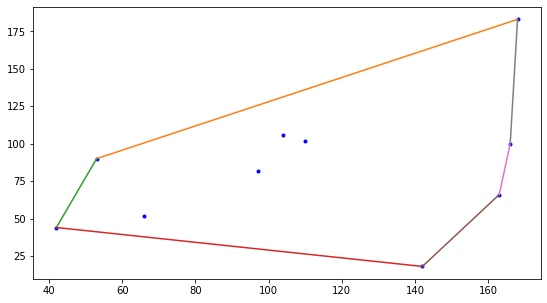

In [436]:
#Generate Initial Set
max = 100

fig = plt.figure(figsize=(20,5))
points = create_points_circle(max,10)
rootsListlc, rootsListrc = pointsToNodes(points)
rootsListlc = MYUP(rootsListlc, hull="lc")
rootsListrc = MYUP(rootsListrc, hull="rc")

finalHull = getHull(rootsListlc, rootsListrc)
drawINSERT(points,fig,hull=finalHull,newPoint=None)

In [437]:
for i in range(len(points)):
    print("{}: ({}|{})".format(i,points[i].x,points[i].y))

0: (166.0|100.0)
1: (104.0|106.0)
2: (97.0|82.0)
3: (168.0|183.0)
4: (66.0|52.0)
5: (110.0|102.0)
6: (163.0|66.0)
7: (142.0|18.0)
8: (42.0|44.0)
9: (53.0|90.0)


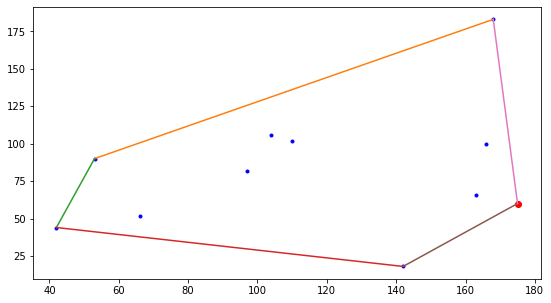

In [438]:
#INSERT new point

isDuplicate = False
newPoint = Point(175.0, 60.0)


for i in range(len(points)):
    #print(points[i].y, newPoint.y)
    if(points[i].y == newPoint.y):
        print("Y-Coordinate already exists")
        isDuplicate = True
    
if(not isDuplicate):
    points.append(newPoint)
    rootsListlc, rootsListrc = INSERT(newPoint, rootsListlc, rootsListrc)

    finalHull = getHull(rootsListlc, rootsListrc)
    
    fig = plt.figure(figsize=(20,5))
    drawINSERT(points,fig,hull=finalHull,newPoint=newPoint)

In [439]:
for i in range(len(points)):
    print("{}: ({}|{})".format(i,points[i].x,points[i].y))

0: (166.0|100.0)
1: (104.0|106.0)
2: (97.0|82.0)
3: (168.0|183.0)
4: (66.0|52.0)
5: (110.0|102.0)
6: (163.0|66.0)
7: (142.0|18.0)
8: (42.0|44.0)
9: (53.0|90.0)
10: (175.0|60.0)


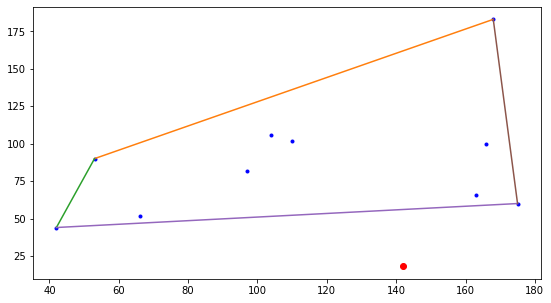

In [441]:
#DELETE a point
pointExists = False
deletePoint = Point(142.0,18.0)

for i in range(len(points)-1,-1,-1):
    if(points[i].x == deletePoint.x and points[i].y == deletePoint.y):
        points.pop(i)
        pointExists = True
        
if(pointExists):
    rootsListlc, rootsListrc = DELETE(deletePoint, rootsListlc, rootsListrc)

    finalHull = getHull(rootsListlc, rootsListrc)
    fig = plt.figure(figsize=(20,5))
    drawINSERT(points,fig,hull=finalHull,newPoint=deletePoint)
else:
    print("Point does not exist")